# Introduction - Fundamentals of Quantum Computing

<p style='text-align: justify;'> We will present and discuss many basic concepts about quantum circuits and how to implement them on Qiskit. We will see how to implement quantum gates and circuit in Qiskit with a brief introduction to noise management</p>

## Qiskit and Qiskit Elements <a id='QiskitInto'></a>

Qiskit Community: https://qiskit.org

How to install and use Qiskit locally: https://qiskit.org/documentation/getting_started.html


## Bits, Qubits and Circuits <a id='Bits'></a>

<p style='text-align: justify;'> Quantum computation, similarly to its classical counterpart, is often described and discussed in terms of a circuital model. Information carriers are called <strong>quantum bits</strong> (<strong>qubits</strong> in short) and will be represented with straight lines. The flow of information is controlled by single- or multi-qubit operations known as <strong>quantum gates</strong> which are represented as boxes with input and output qubit wires. During the quantum computation and at the end of it, classical information, including for example the memory slots in which the results of specific operations are stored, is carried around by classical bits, represented by double straight lines. We will also see some examples of <strong>quantum circuits</strong>, i.e. collections of qubits (i.e. <strong>quantum registers</strong>), <strong>classical registers</strong> of bits and operations, but we will present here their properties in greater detail.
    
In general terms, there are three fundamental stages common to any quantum computation protocol:</p>

* <p style='text-align: justify;'> <strong>input preparation</strong>, i.e. encoding of the initial information into the quantum state of $N$ qubits;</p>
* <p style='text-align: justify;'> <strong>processing of the information</strong>, which is carried out by controlling the physical evolution of the qubits, with quantum gates corresponding to unitary transformations;</p>
* <p style='text-align: justify;'> <strong>output readout</strong>, which is performed by measuring (in the quantum mechanical sense) some specific properties of the qubits. Since quantum measurements are intrinsically probabilistic, the same is also true for many quantum algorithms.</p>


Getting Started with Qiskit Basics <a name='basics'></a>

Here, we provide an overview of working with Qiskit.  

The fundamental package of Qiskit is Terra that provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the [**quantum circuit**](https://en.wikipedia.org/wiki/Quantum_circuit). A basic workflow using Qiskit consists of two stages: **Build** and **Execute**. 

**Build** allows you to make different quantum circuits that represent the problem you are solving, and **Execute** that allows you to run them on different backends.  After the jobs have been run, the data is collected and postprocessed depending on the desired output.

In [1]:
import numpy as np
import math
from qiskit import *
#%matplotlib inline

### Building the circuit <a name='visualize'></a>

The basic element needed for your first program is the QuantumCircuit.  We begin by creating a `QuantumCircuit` comprised of three qubits.

In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3,3)


### Visualize Circuit <a name='visualize'></a>

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the form found in many textbooks. but first let's add some gates to the qubits:


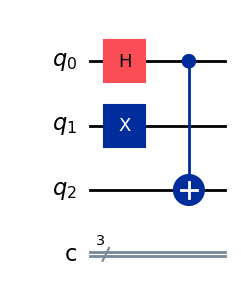

In [3]:
circ.h(0)
circ.x(1)
circ.cx(0,2)
circ.draw(output='mpl')

In [4]:
circ.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ X ├──┼──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
c: 3/══════════

## Simulating circuits <a id='simulation'></a> 

Within Qiskit there are also modules to interact with devices for simulating quantum circuits locally.
Using local noisy simulations is particularly useful for finer algorithm tuning.

The simulators are useful because they provide information about the state output by the ideal circuit and the matrix representation of the circuit. However, a real experiment terminates by ***measuring*** each qubit (usually in the computational $|0\rangle, |1\rangle$ basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits. 

For example, suppose we make independent measurements on each qubit of the three-qubits superposition and let $xyz$ denote the bitstring that results. 

Recall that, under the qubit labeling used by Qiskit, $x$ would correspond to the outcome on qubit 2, $y$ to the outcome on qubit 1, and $z$ to the outcome on qubit 0. 

<div class="alert alert-block alert-info">
<b>Note:</b> This representation of the bitstring puts the most significant bit (MSB) on the left, and the least significant bit (LSB) on the right. This is the standard ordering of binary bitstrings. We order the qubits in the same way, which is why Qiskit uses a non-standard tensor product order.
</div>

Recall the probability of obtaining outcome $xyz$ is given by
$\mathrm{Pr}(xyz) = |\langle xyz | \psi \rangle |^{2}$ and as such for our state probability of obtaining 010 or 111 are both 1/2.

To simulate a circuit that includes measurement, we need to add measurements to the original circuit above, and use a different Aer backend.

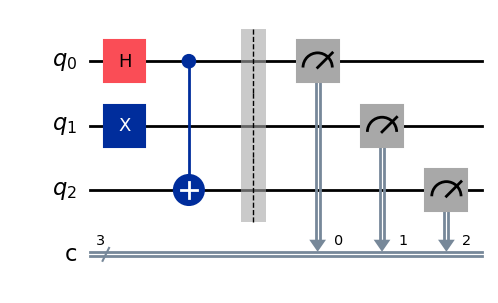

In [5]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3),range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ.compose(meas)

#drawing the circuit
qc.draw('mpl')

This circuit adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits. 

To simulate this circuit, we use the ``Sampler`` in Qiskit. Each run of this circuit will yield either the bitstring 010 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate $\mathrm{Pr}(010)$), we need to repeat the circuit many times. 

The number of times the circuit is repeated can be specified in the ``execute`` function, via the ``shots`` keyword.

In [6]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Sampler

aer_sim = AerSimulator()
sampler = Sampler(mode=aer_sim)
shots=4000

# Execute the circuit on the local simulator.
# We've set the number of repeats of the circuit
# to be 4000.
local_result = sampler.run([qc], shots=shots).result()

Once you have a result object, you can access the results of the quasi-distribution probabilities of the states measured

In [7]:
local_dist = local_result[0].data.c.get_counts()

print("Results: ", local_dist)

Results:  {'010': 2008, '111': 1992}


Approximately 50 percent of the time, the output bitstring is 111. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes. 

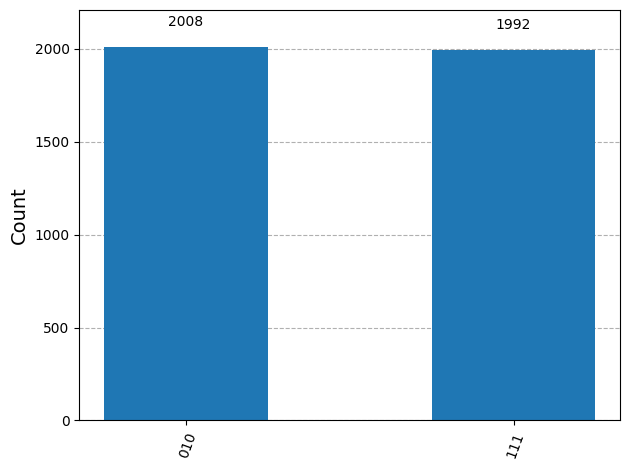

In [8]:
from qiskit.visualization import plot_histogram
plot_histogram(local_dist)

The estimated outcome probabilities $\mathrm{Pr}(010)$ and  $\mathrm{Pr}(111)$ are computed by taking the aggregate counts.

## Running circuits from the IBM Quantum account <a id='ibmq'></a>

To facilitate access to real quantum computing hardware, we have provided a simple API interface.
To access IBM Q devices, you'll need an API token. You can generate, or view, your API token [here](https://quantum-computing.ibm.com/account) (create an account if you don't already have one).

Your IBM Quantum account lets you run your circuit on real devices or on our cloud simulator. Basic account usage can be seen in the examples below.

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService
import os

<div class="alert alert-block alert-info">
NOTE: You need to connect to https://quantum.cloud.ibm.com/ and get the API token for your account and save it locally with the following instruction.

This will store your IBM Quantum credentials in a local file.  Unless your registration information has changed, you only need to do this once.
</div>

In [10]:
token=os.environ.get('QUANTUM_TOKEN')
instance=os.environ.get('QUANTUM_INSTANCE')

In [11]:
service = QiskitRuntimeService(channel="ibm_cloud", token=token, instance=instance)

In [12]:
service.backends()

[<IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_marrakesh')>,
 <IBMBackend('ibm_torino')>]

### Simulating circuits using the IBM Quantum Fake Backends <a id='qcloud'></a>

IBM provides the possibility to simulate a specific backend using the "qiskit_ibm_runtime.fake_provider" library, let's try it. 

In [13]:
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke

backend = FakeSherbrooke()

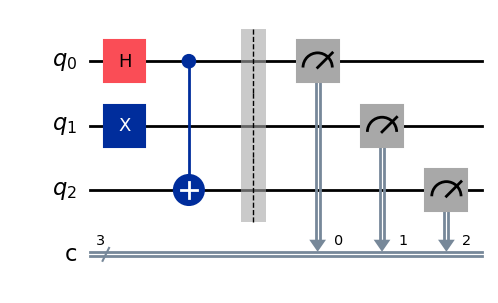

In [14]:
qc.draw('mpl')

In [15]:
# Initialize the sampler using the selected backend
sampler = Sampler(mode=backend)
transpiled_qc = transpile(qc, backend, optimization_level=1)  #this is the transpilation process.. it will be explained later

sim_result = sampler.run([transpiled_qc], shots=shots).result() #run of the transpiled circuit


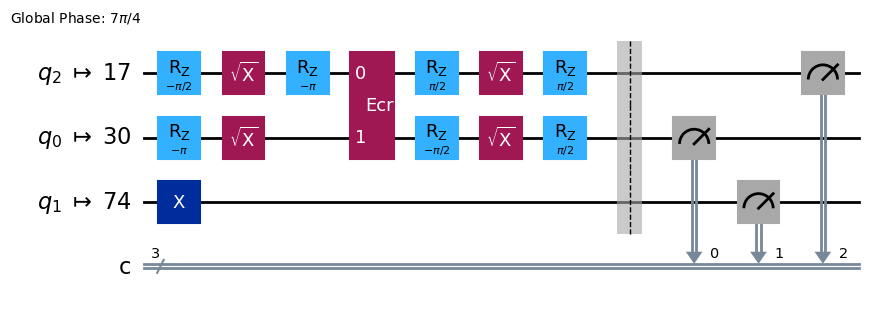

In [16]:
transpiled_qc.draw('mpl')

In [17]:
sim_dist = sim_result[0].data.c.get_counts()

print("Results: ", sim_dist)

Results:  {'111': 1889, '010': 1973, '110': 60, '011': 62, '000': 4, '101': 11, '100': 1}


### Results on fake backend <a id='fake'></a>

As we can see the fake backend simulate the noise we would have using a a real device, getting counts also on states we don't expect to see.

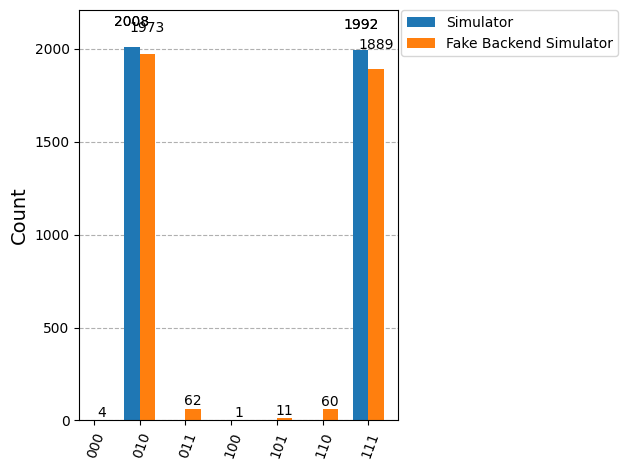

In [18]:
plot_histogram([local_dist,sim_dist], legend=['Simulator','Fake Backend Simulator'])

### Running circuits on real devices <a id='hwq'></a>

Today's quantum information processors are small and noisy, but are advancing at a fast pace. They provide a great opportunity to explore what [noisy, intermediate-scale quantum (NISQ)](https://arxiv.org/abs/1801.00862) computers can do.

In [19]:
#example of backend filtering, you can modify the filters or ask just for the least_busy device

quantum_backend = service.least_busy(operational=True, simulator=False)
quantum_backend.status()

We can se how the hardware is by looking at the coupling map that describes how qubits are connected

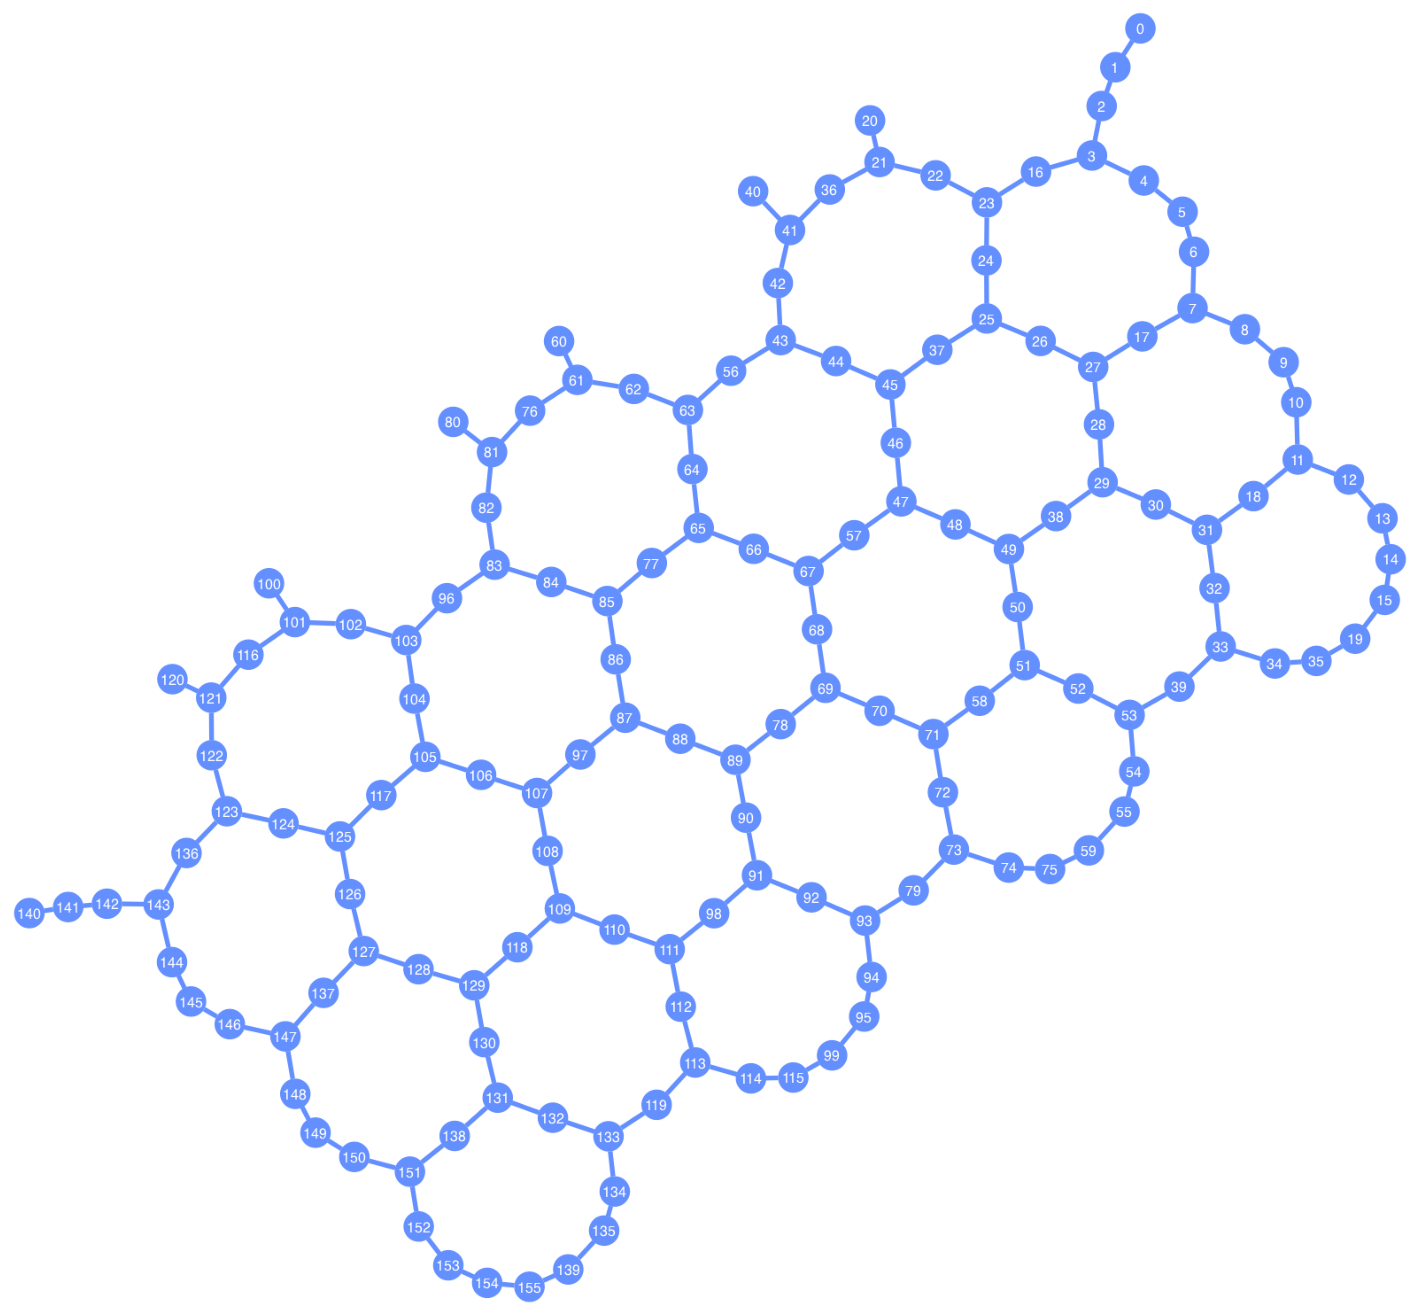

In [20]:
from qiskit.visualization import plot_gate_map
plot_gate_map(quantum_backend)

## Transpilation

Transpiling is the process of converting a circuit into another one, usually targeting a specfic system to run on.
Let's see what are the allowed operations on the targeted backend

Let's recall the circuit we defined before

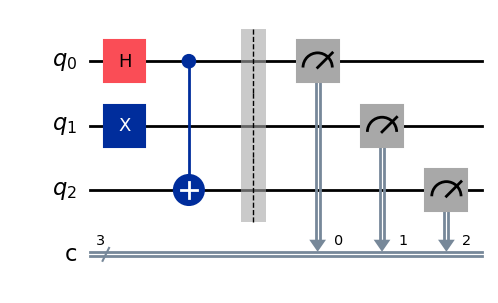

In [21]:
qc.draw('mpl')

Now let's transpile the circuit, remember that in the context of the Qiskit SDK, transpilation refers to the process of transforming an input circuit into a form that is suitable for execution on a quantum device.

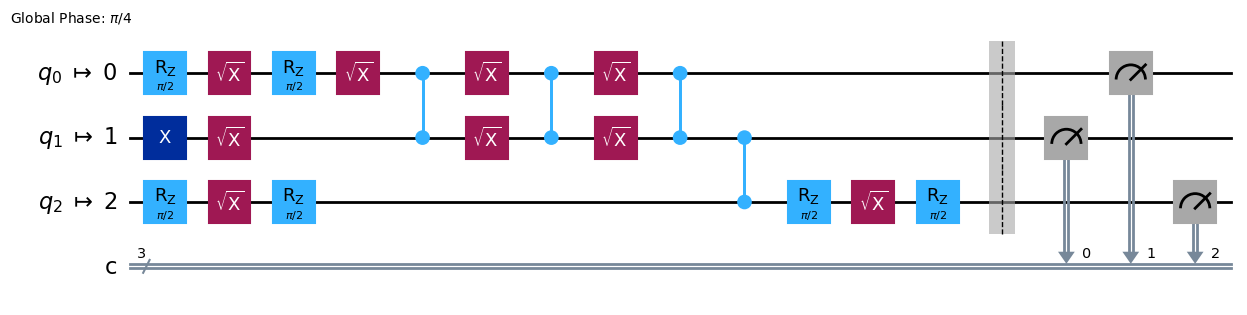

In [22]:
new_qc_0 = transpile(qc, quantum_backend, optimization_level=0)
new_qc_0.draw('mpl', idle_wires=False)

Note that the circuit got longer and the qubits have been rearranged. Transpiler does three basic things:

1) Finds a good `initial_layout` for qubits on the device to minimize number of swap gates, errors, or other metrics.

2) Does the swap mapping.

3) Attempts to optimize gates by merging, cancelling, etc.


NOTE: If you try to execute it again, it is possible you might get a slightly different circuit

Finding a good swap mapping is hard, NP-Hard, therefore Qiskit uses a stochastic heuristic to try to get get a close to optimal mapping with much less work.

Depth: 7
Ops count:  OrderedDict({'rz': 5, 'sx': 3, 'measure': 3, 'x': 1, 'cz': 1, 'barrier': 1})


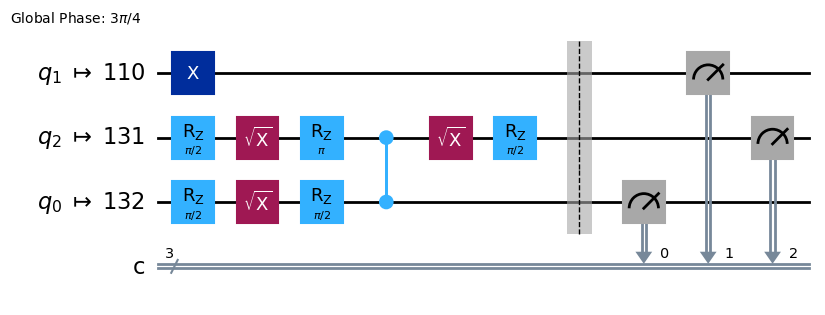

In [23]:
# Transpile the circuit with the optimization level = 2
new_qc_2 = transpile(qc, quantum_backend, optimization_level=2 )
# Print the depth of the transpiled circuit
print('Depth:', new_qc_2.depth())
# Print the number of operations of the transpiled circuit
print('Ops count: ', new_qc_2.count_ops())
new_qc_2.draw('mpl', idle_wires=False)

In [24]:
#Print the depth of both inital and transpiled circuits
print('Initial circuit depth: ', qc.depth())
print('Transpiled circuit (0) depth: ', new_qc_0.depth())
print('Transpiled circuit (2) depth: ', new_qc_2.depth())
#Get the number of operators
print('Initial circuit operation count: ', qc.count_ops())
print('Transpiled circuit (0) operation count: ', new_qc_0.count_ops())
print('Transpiled circuit (2) operation count: ', new_qc_2.count_ops())

Initial circuit depth:  3
Transpiled circuit (0) depth:  14
Transpiled circuit (2) depth:  7
Initial circuit operation count:  OrderedDict({'measure': 3, 'h': 1, 'x': 1, 'cx': 1, 'barrier': 1})
Transpiled circuit (0) operation count:  OrderedDict({'sx': 9, 'rz': 6, 'cz': 4, 'measure': 3, 'x': 1, 'barrier': 1})
Transpiled circuit (2) operation count:  OrderedDict({'rz': 5, 'sx': 3, 'measure': 3, 'x': 1, 'cz': 1, 'barrier': 1})


NOTE: it is also possible to pass a custom topology, given the fact that the transpile method accepts a coupling map as input param

The result from the preceding circuit code is clearly not ideal. The circuit required many gates and is quite deep, which increases the risk of having noisy results. This is a good illustration of the importance of optimizers, which handle many of these potential issues. It's no surprise why there is a lot of research in identifying better ways to optimize circuits to avoid inefficient and noisy circuits

## Execute on real device

To run the circuit on the given device we use also this time the `Sampler`.  Sometimes the devices are busy with jobs from other users.  Your job is added to the list of pending jobs called the queue, and executed in this queue order.  To monitor the status of our job through the process, we can use the `job_monitor`

In [25]:
# Asynchronous execution

sampler = Sampler(mode=quantum_backend)
sampler.options.dynamical_decoupling.enable = False # for the moment, let's suppress error mitigation
sampler.options.twirling.enable_measure = False

quantum_job = sampler.run([new_qc_2], shots=shots)

In [26]:
# Monitor your job
# If working on IBM Quantum Lab, it is more convenient to use the Jobs tab on the left column

quantum_job.status()

'RUNNING'

### INFO: how to cancel a job
to cancel a job, just reference the job object and invoke the `.cancel()` method, which returns a boolean of the status of the cancellation process.
Details in the documentation: https://qiskit.org/documentation/stable/0.19/stubs/qiskit.providers.ibmq.job.IBMQJob.cancel.html

In [27]:
# # if you need to cancel the job, just uncomment these lines
# res = quantum_job.cancel()
# print(res)


### INFO: how to retrieve a job
Sometimes job execution takes too long. It is possible to come back and retrieve the results by using the following code using the `.job()` method

In [28]:
# # if you need to retrieve the job, just uncomment these lines

job_id = quantum_job.job_id()
service.job(job_id)


<RuntimeJobV2('d4iumn574pkc7385f8a0', 'sampler')>

``quantum_job`` has a ``.result()`` method that lets us get the results from running our circuit.

<div class="alert alert-block alert-info">
<b>Note:</b> When the .result() method is called, the code block will wait until the job has finished before releasing the cell.
</div>

In [29]:
quantum_result = quantum_job.result()

Like before, the counts from the execution can be obtained in the same ways as per the simulator approach

Results:  {'010': 1892, '111': 1683, '110': 178, '011': 207, '000': 19, '101': 18, '100': 1, '001': 2}


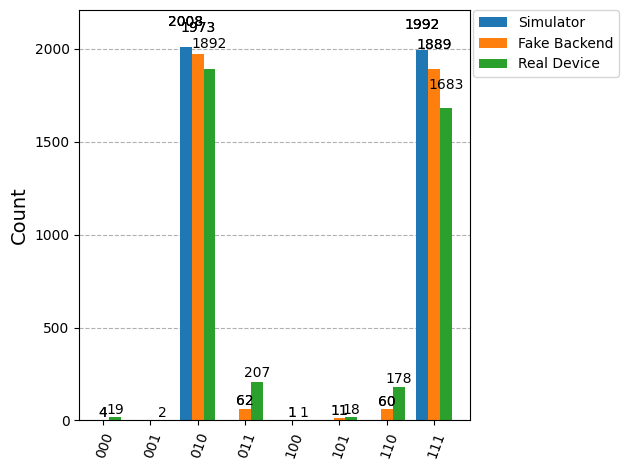

In [30]:
quantum_dist = quantum_result[0].data.c.get_counts()

print("Results: ", quantum_dist)

plot_histogram([local_dist,sim_dist,quantum_dist], legend=['Simulator','Fake Backend','Real Device'])

# Noise Mitigation

In [31]:
sampler = Sampler(mode=quantum_backend)

sampler.options.dynamical_decoupling.enable = True # let's enable error mitigation
sampler.options.twirling.enable_measure = True

quantum_job_mitigation = sampler.run([new_qc_2], shots=shots)

In [32]:
quantum_job_mitigation.status()

'QUEUED'

Results:  {'010': 1815, '111': 1786, '110': 179, '011': 182, '000': 20, '101': 15, '001': 2, '100': 1}


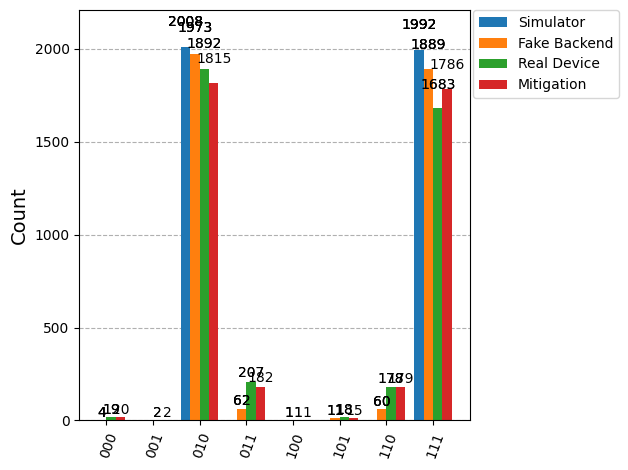

In [33]:
mitigation_result = quantum_job_mitigation.result()

mitigation_dist = mitigation_result[0].data.c.get_counts()
print("Results: ", mitigation_dist)

plot_histogram([local_dist, sim_dist, quantum_dist, mitigation_dist], legend=['Simulator','Fake Backend','Real Device','Mitigation'])